In [1]:
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)

from gym_reachability import gym_reachability  # Custom Gym env.
import os
import gym
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
from collections import namedtuple

from KC_DQN.DDQN import DDQN
from KC_DQN.config import dqnConfig

## THICK

In [2]:
#== CONFIGURATION ==
toEnd = True
env_name = "zermelo_show-v0"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
maxAccess = 3e6
maxSteps = 200
high = 0
thin = False
hard = False
if high==1:
    gamma_init = 0.99
    name_gamma = 'high'
elif high==0:
    gamma_init = 0.95
    name_gamma = 'middle'    
elif high==-1:
    gamma_init = 0.9
    name_gamma = 'low'
if thin:
    thickness = .1
    name_thickness = 'thin'
else:
    thickness = 1.
    name_thickness = 'thick'
name_label = '{:s}_{:s}'.format(name_gamma, name_thickness)

if hard:
    figureFolder='figure/show/hard/sparse/{:s}'.format(name_label)
else:
    figureFolder='figure/show/sparse/{:s}'.format(name_label)
os.makedirs(figureFolder, exist_ok=True)
if toEnd:
    maxEpisodes = int(maxAccess / maxSteps)
else:
    maxEpisodes = 60000
update_period = int(maxEpisodes / 10)
update_period_half = int(update_period/2)

CONFIG = dqnConfig(DEVICE=device, ENV_NAME=env_name, 
                   MAX_EPISODES=maxEpisodes, MAX_EP_STEPS=maxSteps,
                   BATCH_SIZE=100, MEMORY_CAPACITY=10000,
                   GAMMA=gamma_init, GAMMA_PERIOD=1000000,
                   EPS_PERIOD=1000, EPS_DECAY=0.6,
                   LR_C=1e-3, LR_C_PERIOD=2000, LR_C_DECAY=0.8)

In [3]:
# == Environment ==
reward = -1
penalty = 1
scaling = 1.
if toEnd:
    env = gym.make(env_name, device=device, doneType='toEnd', thickness=thickness, hard=hard)
else:
    env = gym.make(env_name, device=device)
env.set_costParam(penalty, reward, 'sparse', scaling)

s_dim = env.observation_space.shape[0]
action_num = env.action_space.n
action_list = np.arange(action_num)
print(env.spec.id)
print(s_dim, action_num)

Env: mode---normal; doneType---toEnd
zermelo_show-v0
2 3


### MIDDLE_THICK

=> Restore models/store_best/naive/sparse/middle_thick/model-1427417.pth


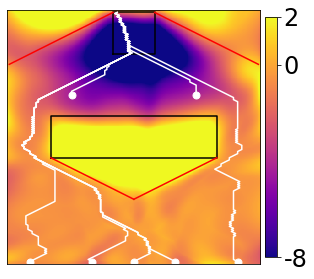

In [4]:
#== AGENT ==
agent = DDQN(s_dim, action_num, CONFIG, action_list, mode='normal')
agent.restore('models/store_best/naive/sparse/{:s}_{:s}/model-{:d}.pth'.format(name_gamma, name_thickness, 1427417))

#== PLOT ==
env.visualize_analytic_comparison(agent.Q_network, True, vmin=-8, vmax=2, nx=301, ny=301, labels=None)
env.plot_reach_avoid_set()
env.plot_trajectories(agent.Q_network, T=200, states=env.visual_initial_states, toEnd=True)
#env.plot_trajectories(agent.Q_network, T=200, num_rnd_traj=100, toEnd=True, keepOutOf=True)
plt.tight_layout()
plt.savefig('{:s}/lagrange_{:s}.eps'.format(figureFolder, name_label))
plt.show()

### LOW_THICK

In [5]:
high = -1
thin = False
hard = False
if high==1:
    gamma_init = 0.99
    name_gamma = 'high'
elif high==0:
    gamma_init = 0.95
    name_gamma = 'middle'    
elif high==-1:
    gamma_init = 0.9
    name_gamma = 'low'
if thin:
    thickness = .1
    name_thickness = 'thin'
else:
    thickness = 1.
    name_thickness = 'thick'
name_label = '{:s}_{:s}'.format(name_gamma, name_thickness)

if hard:
    figureFolder='figure/show/hard/sparse/{:s}'.format(name_label)
else:
    figureFolder='figure/show/sparse/{:s}'.format(name_label)

=> Restore models/store_best/naive/sparse/low_thick/model-1417353.pth


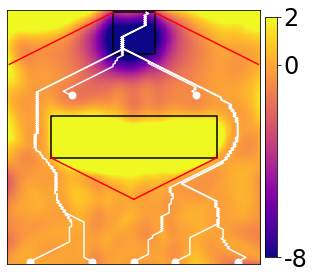

In [6]:
#== AGENT ==
agent = DDQN(s_dim, action_num, CONFIG, action_list, mode='normal')
agent.restore('models/store_best/naive/sparse/{:s}_{:s}/model-{:d}.pth'.format(name_gamma, name_thickness, 1417353))

#== PLOT ==
env.visualize_analytic_comparison(agent.Q_network, True, vmin=-8, vmax=2, nx=301, ny=301, labels=None)
env.plot_reach_avoid_set()
env.plot_trajectories(agent.Q_network, T=200, states=env.visual_initial_states, toEnd=True)
#env.plot_trajectories(agent.Q_network, T=200, num_rnd_traj=100, toEnd=True, keepOutOf=True)
plt.tight_layout()
plt.savefig('{:s}/lagrange_{:s}.eps'.format(figureFolder, name_label))
plt.show()

## THIN

### MIDDLE_THIN

In [7]:
high = 0
thin = True
hard = False
if high==1:
    gamma_init = 0.99
    name_gamma = 'high'
elif high==0:
    gamma_init = 0.95
    name_gamma = 'middle'    
elif high==-1:
    gamma_init = 0.9
    name_gamma = 'low'
if thin:
    thickness = .1
    name_thickness = 'thin'
else:
    thickness = 1.
    name_thickness = 'thick'
name_label = '{:s}_{:s}'.format(name_gamma, name_thickness)

if hard:
    figureFolder='figure/show/hard/sparse/{:s}'.format(name_label)
else:
    figureFolder='figure/show/sparse/{:s}'.format(name_label)

In [8]:
# == Environment ==
reward = -1
penalty = 1
scaling = 1.
if toEnd:
    env = gym.make(env_name, device=device, doneType='toEnd', thickness=thickness, hard=hard)
else:
    env = gym.make(env_name, device=device)
env.set_costParam(penalty, reward, 'sparse', scaling)

s_dim = env.observation_space.shape[0]
action_num = env.action_space.n
action_list = np.arange(action_num)
print(env.spec.id)
print(s_dim, action_num)

Env: mode---normal; doneType---toEnd
zermelo_show-v0
2 3


=> Restore models/store_best/naive/sparse/middle_thin/model-1388884.pth


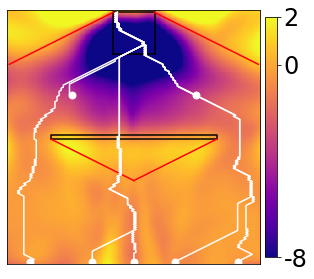

In [9]:
#== AGENT ==
agent = DDQN(s_dim, action_num, CONFIG, action_list, mode='normal')
agent.restore('models/store_best/naive/sparse/{:s}_{:s}/model-{:d}.pth'.format(name_gamma, name_thickness, 1388884))

#== PLOT ==
env.visualize_analytic_comparison(agent.Q_network, True, vmin=-8, vmax=2, nx=301, ny=301, labels=None)
env.plot_reach_avoid_set()
env.plot_trajectories(agent.Q_network, T=200, states=env.visual_initial_states, toEnd=True)
#env.plot_trajectories(agent.Q_network, T=200, num_rnd_traj=100, toEnd=True, keepOutOf=True)
plt.tight_layout()
plt.savefig('{:s}/lagrange_{:s}.eps'.format(figureFolder, name_label))
plt.show()

### LOW_THIN

In [10]:
high = -1
thin = True
hard = False
if high==1:
    gamma_init = 0.99
    name_gamma = 'high'
elif high==0:
    gamma_init = 0.95
    name_gamma = 'middle'    
elif high==-1:
    gamma_init = 0.9
    name_gamma = 'low'
if thin:
    thickness = .1
    name_thickness = 'thin'
else:
    thickness = 1.
    name_thickness = 'thick'
name_label = '{:s}_{:s}'.format(name_gamma, name_thickness)

if hard:
    figureFolder='figure/show/hard/sparse/{:s}'.format(name_label)
else:
    figureFolder='figure/show/sparse/{:s}'.format(name_label)

=> Restore models/store_best/naive/sparse/low_thin/model-1323237.pth


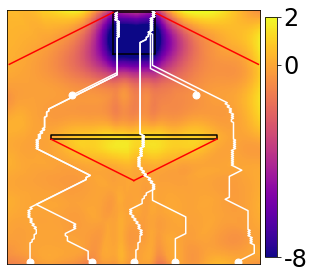

In [11]:
#== AGENT ==
agent = DDQN(s_dim, action_num, CONFIG, action_list, mode='normal')
agent.restore('models/store_best/naive/sparse/{:s}_{:s}/model-{:d}.pth'.format(name_gamma, name_thickness, 1323237))

#== PLOT ==
env.visualize_analytic_comparison(agent.Q_network, True, vmin=-8, vmax=2, nx=301, ny=301, labels=None)
env.plot_reach_avoid_set()
env.plot_trajectories(agent.Q_network, T=200, states=env.visual_initial_states, toEnd=True)
#env.plot_trajectories(agent.Q_network, T=200, num_rnd_traj=100, toEnd=True, keepOutOf=True)
plt.tight_layout()
plt.savefig('{:s}/lagrange_{:s}.eps'.format(figureFolder, name_label))
plt.show()